# Lesson - Working with Missing and Duplicate Data
We have already learned that there are various ways to handle missing data:
1. Remove any rows that have missing values.
2. Remove any columns that have missing values.
3. Fill the missing values with some other value.
4. Leave the missing values as is.

We will work with datasets World Happiness Reports 2015, 2016 and 2017 modified to contain same country names but with missing values filled up with NAN. Original datasets can be found [here](https://www.kaggle.com/unsdsn/world-happiness#2015.csv)
> 
Country	Region	Happiness Rank	Happiness Score	Lower Confidence Interval	Upper Confidence Interval	Economy (GDP per Capita)	Family	Health (Life Expectancy)	Freedom	Trust (Government Corruption)	Generosity	Dystopia Residual	Year
157	Central African Republic	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	2016


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
happiness2015=pd.read_csv('wh_2015.csv')
happiness2016=pd.read_csv('wh_2016.csv')
happiness2017=pd.read_csv('wh_2017.csv')
print(happiness2015.shape)
print(happiness2016.shape)
print(happiness2017.shape)
print(happiness2015.info())
print(happiness2016.info())
print(happiness2017.info())

(164, 13)
(164, 14)
(164, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        164 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                

### Identifying Missing Values using [`Series.isnull(self)` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isnull.html)
We use `isnull()` combined with `sum()` to give total no of NAN values for each column

In [2]:
missing_2015=happiness2015.isnull().sum()
missing_2016=happiness2016.isnull().sum()
missing_2017=happiness2017.isnull().sum()
print(missing_2015)
print(missing_2016)
print(missing_2017)

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64
Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64
Country                      

### Correcting Data Cleaning Errors that result in Missing Values
We use [pd.conct() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to combine dataframes, we find a large number of missing values not commensurate with individual dataframes above.


In [3]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
combined.isnull().sum()

Country                            0
Region                           177
Happiness Rank                   177
Happiness Score                  177
Standard Error                   334
Economy (GDP per Capita)         177
Family                            22
Health (Life Expectancy)         177
Freedom                           22
Trust (Government Corruption)    177
Generosity                        22
Dystopia Residual                177
Year                               0
Lower Confidence Interval        335
Upper Confidence Interval        335
Happiness.Rank                   337
Happiness.Score                  337
Whisker.high                     337
Whisker.low                      337
Economy..GDP.per.Capita.         337
Health..Life.Expectancy.         337
Trust..Government.Corruption.    337
Dystopia.Residual                337
dtype: int64

- We need to start checking if the error is in column names. We can clearly see that the errors are due to incompatible column names and we need to make them identical using `str` operations:
> `Series.str.split()`	Splits each element in the Series.
`Series.str.strip()`	Strips whitespace from each string in the Series.
`Series.str.lower()`	Converts strings in the Series to lowercase.
`Series.str.upper()`	Converts strings in the Series to uppercase.
`Series.str.get()`	Retrieves the ith element of each element in the Series.
`Series.str.replace()`	Replaces a regex or string in the Series with another string.
`Series.str.cat()`	Concatenates strings in a Series.
`Series.str.extract()`	Extracts substrings from the Series matching a regex pattern.<

- All letters should be uppercase.
- There should be only one space between words.
- There should be no parentheses in column names
 For example, the Health (Life Expectancy) columns should both be renamed to HEALTH LIFE EXPECTANCY.

In [4]:
print(happiness2015.columns)
print(happiness2016.columns)
print(happiness2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')


In [5]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
combined=pd.concat([happiness2015,happiness2016,happiness2017],ignore_index=True)
missing=combined.isnull().sum()
print(happiness2015.columns)
print(happiness2016.columns)
print(happiness2017.columns)
print(missing)

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')
Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR'],
      dtype='object')
Index(['COUNTRY', 'HAPPINESS RANK', 'HAPPINESS SCORE', 'WHISKER HIGH',
       'WHISKER LOW', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY',
       'TRUST GOVERNMENT CORRUPTION', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')
COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE        

### Visualizing Missing Data with a [Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
``` seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
```


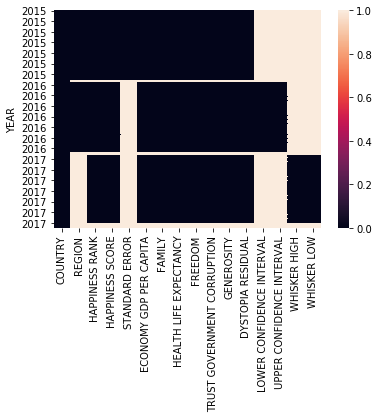

In [6]:
import seaborn as sns
combined_updated = combined.set_index('YEAR') #Seborn heatmap index/column info for labelling
sns.heatmap(combined_updated.isnull(),cbar=True)# For a boolean value only two colors pink=1.0 or True, black=0.0 or False

Above, We can make the following observations:

- No values are missing in the COUNTRY column.
- There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the COUNTRY column.
- Some columns only have data populated for one year.
- It looks like the REGION data is missing for the year 2017. 

In [7]:
regions_2017=combined[combined["YEAR"]==2017]['REGION'] # to confirm whether 'REGION' column Data is missing from happiness2017
missing=regions_2017.isnull().sum()
print(missing)

164


In order to do fill missing "REGION" values for 2017, we'll use the following strategy:

- Create a dataframe containing all of the countries and corresponding regions from the happiness2015, happiness2016, and happiness2017 dataframes.
- Use the pd.merge() function to assign the REGION in the dataframe above to the corresponding country in combined.
- The result will have two region columns - the original column with missing values will be named REGION_x. The updated column without missing values will be named REGION_y. We'll drop REGION_x to eliminate confusion.

In [8]:
regions=happiness2015[['COUNTRY','REGION']]
missing_regions=regions['REGION'].isnull()



mapping_list=['Latin America and Caribbean','Latin America and Caribbean','Latin America and Caribbean','Middle East and Northern Africa','Middle East and Northern Africa','Sub-Saharan Africa']
regions.iloc[-6:,1]=mapping_list#replacing NAN values in REGION column
print(regions.head())
print(regions.tail())
region_groups=regions.groupby('REGION').size()
regions.info()


       COUNTRY          REGION
0  Switzerland  Western Europe
1      Iceland  Western Europe
2      Denmark  Western Europe
3       Norway  Western Europe
4       Canada   North America
               COUNTRY                           REGION
159            Namibia      Latin America and Caribbean
160        Puerto Rico      Latin America and Caribbean
161            Somalia  Middle East and Northern Africa
162  Somaliland Region  Middle East and Northern Africa
163        South Sudan               Sub-Saharan Africa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COUNTRY  164 non-null    object
 1   REGION   164 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


C:\Users\pc\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
combined=pd.merge(left=combined, right=regions,on='COUNTRY',how='left') 
print(combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTRY                      492 non-null    object 
 1   REGION_x                     315 non-null    object 
 2   HAPPINESS RANK               470 non-null    float64
 3   HAPPINESS SCORE              470 non-null    float64
 4   STANDARD ERROR               158 non-null    float64
 5   ECONOMY GDP PER CAPITA       470 non-null    float64
 6   FAMILY                       470 non-null    float64
 7   HEALTH LIFE EXPECTANCY       470 non-null    float64
 8   FREEDOM                      470 non-null    float64
 9   TRUST GOVERNMENT CORRUPTION  470 non-null    float64
 10  GENEROSITY                   470 non-null    float64
 11  DYSTOPIA RESIDUAL            470 non-null    float64
 12  YEAR                         492 non-null    int64  
 13  LOWER CONFIDENCE INT

In [10]:
combined=combined.drop('REGION_x',axis=1)#drop extra region column
combined.rename({'REGION_y':'REGION'},axis=1,inplace=True)#Renaming 'REGION-y' colum tp 'REGION'
print(combined.info())
missing=combined.isnull().sum()#check for missing values
print(missing)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTRY                      492 non-null    object 
 1   HAPPINESS RANK               470 non-null    float64
 2   HAPPINESS SCORE              470 non-null    float64
 3   STANDARD ERROR               158 non-null    float64
 4   ECONOMY GDP PER CAPITA       470 non-null    float64
 5   FAMILY                       470 non-null    float64
 6   HEALTH LIFE EXPECTANCY       470 non-null    float64
 7   FREEDOM                      470 non-null    float64
 8   TRUST GOVERNMENT CORRUPTION  470 non-null    float64
 9   GENEROSITY                   470 non-null    float64
 10  DYSTOPIA RESIDUAL            470 non-null    float64
 11  YEAR                         492 non-null    int64  
 12  LOWER CONFIDENCE INTERVAL    157 non-null    float64
 13  UPPER CONFIDENCE INT

### Identifying Duplicate Values
We'll use the [`DataFrame.duplicated() method`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) to check for duplicate values. If no parameters are specified, the method will check for any rows in which all columns have the same values.

In [11]:
dups=combined.duplicated(['COUNTRY','YEAR'])
print(combined[dups])#Empty dataframe is returned signifying that no entry with both Country and Year exists

Empty DataFrame
Columns: [COUNTRY, HAPPINESS RANK, HAPPINESS SCORE, STANDARD ERROR, ECONOMY GDP PER CAPITA, FAMILY, HEALTH LIFE EXPECTANCY, FREEDOM, TRUST GOVERNMENT CORRUPTION, GENEROSITY, DYSTOPIA RESIDUAL, YEAR, LOWER CONFIDENCE INTERVAL, UPPER CONFIDENCE INTERVAL, WHISKER HIGH, WHISKER LOW, REGION]
Index: []


In order to check whether no duplication may be due to random capitalization in `COUNTRY` column we will standardize case for countries and check again. 

In [12]:
combined['COUNTRY']=combined['COUNTRY'].str.upper()

dups=combined.duplicated(['COUNTRY','YEAR'])#keep Kwarg is default set to 'first' which omits 1st instance of duplication
print(combined[dups])

               COUNTRY  HAPPINESS RANK  HAPPINESS SCORE  STANDARD ERROR  \
162  SOMALILAND REGION             NaN              NaN             NaN   
326  SOMALILAND REGION             NaN              NaN             NaN   
489  SOMALILAND REGION             NaN              NaN             NaN   

     ECONOMY GDP PER CAPITA  FAMILY  HEALTH LIFE EXPECTANCY  FREEDOM  \
162                     NaN     NaN                     NaN      NaN   
326                     NaN     NaN                     NaN      NaN   
489                     NaN     NaN                     NaN      NaN   

     TRUST GOVERNMENT CORRUPTION  GENEROSITY  DYSTOPIA RESIDUAL  YEAR  \
162                          NaN         NaN                NaN  2015   
326                          NaN         NaN                NaN  2016   
489                          NaN         NaN                NaN  2017   

     LOWER CONFIDENCE INTERVAL  UPPER CONFIDENCE INTERVAL  WHISKER HIGH  \
162                        NaN            

In [13]:
combined['COUNTRY']=combined['COUNTRY'].str.upper()

dups=combined.duplicated(['COUNTRY','YEAR'],keep=False)#keep Kwarg is now set to 'False' which returns all instances of duplication
print(combined[dups])

               COUNTRY  HAPPINESS RANK  HAPPINESS SCORE  STANDARD ERROR  \
90   SOMALILAND REGION            91.0            5.057         0.06161   
162  SOMALILAND REGION             NaN              NaN             NaN   
260  SOMALILAND REGION            97.0            5.057             NaN   
326  SOMALILAND REGION             NaN              NaN             NaN   
488  SOMALILAND REGION             NaN              NaN             NaN   
489  SOMALILAND REGION             NaN              NaN             NaN   

     ECONOMY GDP PER CAPITA   FAMILY  HEALTH LIFE EXPECTANCY  FREEDOM  \
90                  0.18847  0.95152                 0.43873  0.46582   
162                     NaN      NaN                     NaN      NaN   
260                 0.25558  0.75862                 0.33108  0.39130   
326                     NaN      NaN                     NaN      NaN   
488                     NaN      NaN                     NaN      NaN   
489                     NaN      NaN

Next, let's use the [`df.drop_duplicates()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to drop the duplicate rows. Like the `df.duplicated()` method, the `df.drop_duplicates()` method will define duplicates as rows in which all columns have the same values. We'll have to specify that rows with the same values in only the COUNTRY and YEAR columns should be dropped.
It's also important to note that by default, the `drop_duplicates() method` will only keep the first duplicate row. To keep the last duplicate row, set the keep parameter to 'last'. Sometimes, this will mean sorting the dataframe before dropping the duplicate rows.

In [14]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
combined=combined.drop_duplicates(['COUNTRY','YEAR'],keep='first')
dups=combined.duplicated(['COUNTRY','YEAR'],keep=False)#keep Kwarg is now set to 'False' which returns all instances of duplication
print(combined[dups])#we get empty dataframe, so no instances of duplication where Country and Year are same.

Empty DataFrame
Columns: [COUNTRY, HAPPINESS RANK, HAPPINESS SCORE, STANDARD ERROR, ECONOMY GDP PER CAPITA, FAMILY, HEALTH LIFE EXPECTANCY, FREEDOM, TRUST GOVERNMENT CORRUPTION, GENEROSITY, DYSTOPIA RESIDUAL, YEAR, LOWER CONFIDENCE INTERVAL, UPPER CONFIDENCE INTERVAL, WHISKER HIGH, WHISKER LOW, REGION]
Index: []


### Handle Missing Values by Dropping Columns
So far, to correct missing values we:
- Corrected the errors we made when combining our dataframes.
- Used the 2015 and 2016 region values to fill in the missing regions for 2017.

Next, we'll consider dropping columns with missing data:
- Check for errors in data cleaning/transformation.
- Use data from additional sources to fill missing values.
- Drop row/column.
- Fill missing values with reasonable estimates computed from the available data.

In [15]:
combined.isnull().sum() # Checking for missing entries in columns

COUNTRY                          0
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
STANDARD ERROR                 331
ECONOMY GDP PER CAPITA          19
FAMILY                          19
HEALTH LIFE EXPECTANCY          19
FREEDOM                         19
TRUST GOVERNMENT CORRUPTION     19
GENEROSITY                      19
DYSTOPIA RESIDUAL               19
YEAR                             0
LOWER CONFIDENCE INTERVAL      332
UPPER CONFIDENCE INTERVAL      332
WHISKER HIGH                   334
WHISKER LOW                    334
REGION                           0
dtype: int64

We will drop following columns:
`STANDARD ERROR`
`LOWER CONFIDENCE INTERVAL`
`UPPER CONFIDENCE INTERVAL`
`WHISKER HIGH`
`WHISKER LOW`

In [16]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']
combined_1=combined.drop(columns_to_drop,axis=1)
combined_1.isnull().sum()

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION                          0
dtype: int64

Working with bigger datasets, it can sometimes be tedious to create a long list of column names to drop. Instead we can use the `DataFrame.dropna()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) to complete the same task.
By default, the `dropna() method` will drop rows with any missing values. To drop columns, we can set the axis parameter equal to 1, just like with the df.drop() method.

As an alternate to naming columns to drop and using `df.drop()` method, we can use `df.dropna()` method and set `thresh` parameter to values of columns that we want to drop after first using `df.notnull().sum()` method to identify number of not-null values in each column. 

In [21]:
not_null=combined.notnull().sum()
print(not_null)

COUNTRY                        489
HAPPINESS RANK                 470
HAPPINESS SCORE                470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
HEALTH LIFE EXPECTANCY         470
FREEDOM                        470
TRUST GOVERNMENT CORRUPTION    470
GENEROSITY                     470
DYSTOPIA RESIDUAL              470
YEAR                           489
REGION                         489
dtype: int64


Now we can set `thresh` to 159 to drop columns with less than 159 not-null entries

In [22]:
combined=combined.dropna(axis=1,how='any',thresh=159,inplace=False)
missing=combined.isnull().sum()
print(missing)

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION                          0
dtype: int64


### Analyzing Remaining Missing Data
We have to find out if dropping missing entriew will result in loss of valuable data. For this we will create a heatmap after first setting index to `REGION` and sorting values by `REGION` and `Happiness Score`.

In [24]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 491
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTRY                      489 non-null    object 
 1   HAPPINESS RANK               470 non-null    float64
 2   HAPPINESS SCORE              470 non-null    float64
 3   ECONOMY GDP PER CAPITA       470 non-null    float64
 4   FAMILY                       470 non-null    float64
 5   HEALTH LIFE EXPECTANCY       470 non-null    float64
 6   FREEDOM                      470 non-null    float64
 7   TRUST GOVERNMENT CORRUPTION  470 non-null    float64
 8   GENEROSITY                   470 non-null    float64
 9   DYSTOPIA RESIDUAL            470 non-null    float64
 10  YEAR                         489 non-null    int64  
 11  REGION                       489 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 49.7+ KB


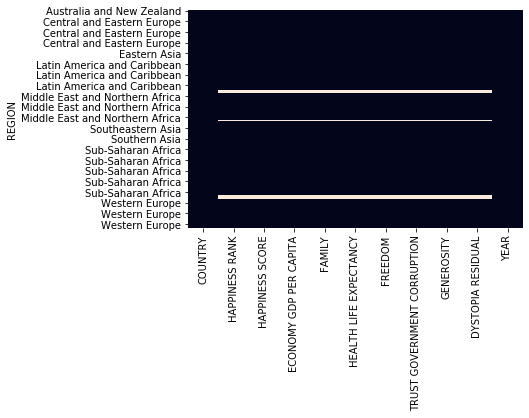

In [25]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)

In the heatmap above, the missing values are represented with light gray and all other values with black. From this visualization, we can confirm that if the data is missing, it's missing in almost every column. We'll conclude that dropping the missing values won't cause us to lose valuable information in other columns.
From the visualization above, we can also identify that only three regions contain missing values:
- Sub-Saharan Africa
- Middle East and Northern Africa
- Latin America and Carribbean

### Handling Missing Values with Imputation
The Sub-Saharan Africa region contains the most missing values, accounting for about 9 percent of that regions's values. Since we'd like to analyze the data according to region, we should also think about how these values impact the analysis for this region specifically.

let's consider handling the missing values by replacing them with estimated values, also called imputation.

- Check for errors in data cleaning/transformation.
- Use data from additional sources to fill missing values.
- Drop row/column.
- Fill missing values with reasonable estimates computed from the available data.

There are many options for choosing the replacement value, including:

- A constant value
- The mean of the column
- The median of the column
- The mode of the column
For non-numeric columns, common replacement values include the most frequent value or a string like "Unknown" that is used to treat missing values as a separate category.
For numeric columns, it's very common to replace missing values with the mean. Since the rest of the columns in combined with missing data are all numeric, we'll explore this option.

First, we will analyze how replacing missing values with the mean affects the distribution of the data. In order to do so, we'll use the `Series.fillna()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) to replace the missing values with the mean.

In [27]:
happiness_mean=combined['HAPPINESS SCORE'].mean()
print(happiness_mean)
combined['HAPPINESS SCORE UPDATED']=combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())
print(combined.info())


5.370727659882893
5.370727659882894
<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 491
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTRY                      489 non-null    object 
 1   HAPPINESS RANK               470 non-null    float64
 2   HAPPINESS SCORE              470 non-null    float64
 3   ECONOMY GDP PER CAPITA       470 non-null    float64
 4   FAMILY                       470 non-null    float64
 5   HEALTH LIFE EXPECTANCY       470 non-null    float64
 6   FREEDOM                      470 non-null    float64
 7   TRUST GOVERNMENT CORRUPTION  470 non-null    float64
 8   GENEROSITY                   470 non-null    float64
 9   DYSTOPIA RESIDUAL            470 non-null    float64
 10  YEAR                         489 non-null    int64  
 11  REGION                       489 non-null    object 
 12  HAPPINESS SCORE UPDATED      489 non-null 

### Dropping Rows
We have to analyze `HAPPINESS SCORE` `REGION` wise in order to decide whether `mean` is a good fit for missing values. Below, since Sub Saharan Africa mean values are substantially lower than overall mean, we will drop the rows with null values.

In [29]:
combined.pivot_table(index='REGION', values='HAPPINESS SCORE',aggfunc=np.mean, margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.026357
Middle East and Northern Africa,5.379426
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.114875


In [31]:
combined=combined.dropna(axis=0,how='any',inplace=False)
missing=combined.isnull().sum()
print(missing)
print(combined.info())

COUNTRY                        0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
HEALTH LIFE EXPECTANCY         0
FREEDOM                        0
TRUST GOVERNMENT CORRUPTION    0
GENEROSITY                     0
DYSTOPIA RESIDUAL              0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 482
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTRY                      470 non-null    object 
 1   HAPPINESS RANK               470 non-null    float64
 2   HAPPINESS SCORE              470 non-null    float64
 3   ECONOMY GDP PER CAPITA       470 non-null    float64
 4   FAMILY                       470 non-null    float64
 5   HEALTH LIFE EXPECTANCY       470 non-null 

There is no perfect way to handle missing values and each situation is different, now we know the basic techniques and built some intuition around them to better inform our decisions. Below is the workflow we used to clean missing values:
- Check for errors in data cleaning/transformation.
- Use data from additional sources to fill missing values.
- Drop row/column.
- Fill missing values with reasonable estimates computed from the available data.

We also started to set a more defined data cleaning workflow, in which we:
- Set a goal for the project.
- Researched and tried to understand the data.
- Determined what data was needed to complete our analysis.
- Added columns.
- Cleaned specific data types.
- Combined data sets.
- Removed duplicate values.
- Handled the missing values.